<a href="https://colab.research.google.com/github/nafalrifky/midterm-deep-learning/blob/main/midterm_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Regresi
## Nafal Rifky Atsilah Maulana - 1103223106

In this assignment, you will build an end-to-end regression model. You will work with the provided dataset, perform data cleaning and preprocessing, handle missing values and outliers, and engineer or select relevant features. You are required to implement machine learning or deep learning regression
 algorithms to predict the target variable. The workflow should include data preprocessing, model training, basic hyperparameter tuning, and evaluation using appropriate regression metrics (such as MSE, RMSE, MAE, or R²), along with a brief interpretation of the results.


In [1]:
pip install gdown

In [2]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=46220fff-b9a4-4598-8b34-9b0f3e0b7f65
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:06<00:00, 72.4MB/s]


'midterm-regresi-dataset.csv'

# Task
Develop an end-to-end deep learning regression model to predict the release year of songs based on their audio characteristics, using the `midterm-regresi-dataset.csv` file. The workflow should include loading and inspecting the data, separating features and the target variable, handling missing values and outliers, applying feature scaling, splitting the data into training and test sets, building and training a deep learning model, evaluating its performance using appropriate regression metrics (MSE, RMSE, MAE, R²), and interpreting the results.

## Load and Inspect Data

### Subtask:
Load the 'midterm-regresi-dataset.csv' file into a pandas DataFrame. Display the first few rows, check data types, and get a summary of basic statistics to understand the dataset's structure and content.


**Reasoning**:
To begin, I will import the pandas library, load the specified CSV file into a DataFrame, display its first few rows, show its information (data types and non-null counts), and generate descriptive statistics to understand the dataset's structure and content as per the subtask instructions.



In [3]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('midterm-regresi-dataset.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics of the DataFrame
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -

**Reasoning**:
The previous loading of the CSV file incorrectly interpreted the first row as headers. To rectify this, I will reload the dataset without a header, then assign appropriate column names: 'release_year' for the first column and 'feature_1' to 'feature_90' for the remaining columns. Afterward, I will re-display the first few rows, re-check the data types, and re-generate descriptive statistics to ensure the data is correctly structured.



In [4]:
import pandas as pd

# Reload the dataset, specifying no header
df = pd.read_csv('midterm-regresi-dataset.csv', header=None)

# Assign column names: 'release_year' for the first column and 'feature_1' to 'feature_90' for the rest
column_names = ['release_year'] + [f'feature_{i}' for i in range(1, 91)]
df.columns = column_names

# Display the first 5 rows of the DataFrame after assigning headers
print("First 5 rows of the DataFrame with corrected headers:")
print(df.head())

# Print a concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Info with corrected headers:")
df.info()

# Generate descriptive statistics of the DataFrame
print("\nDescriptive Statistics with corrected headers:")
print(df.describe())

First 5 rows of the DataFrame with corrected headers:
   release_year  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          2001   49.94357   21.47114   73.07750    8.74861  -17.40628   
1          2001   48.73215   18.42930   70.32679   12.94636  -10.32437   
2          2001   50.95714   31.85602   55.81851   13.41693   -6.57898   
3          2001   48.24750   -1.89837   36.29772    2.58776    0.97170   
4          2001   50.97020   42.20998   67.09964    8.46791  -15.85279   

   feature_6  feature_7  feature_8  feature_9  ...  feature_81  feature_82  \
0  -13.09905  -25.01202  -12.23257    7.83089  ...    13.01620   -54.40548   
1  -24.83777    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073   
2  -18.54940   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   
3  -26.21683    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   
4  -16.81409  -12.48207   -9.37636   12.63699  ...     9.92661   -55.95724   

   feature_83  feature_84  featu

## Separate Features and Target

### Subtask:
Separate the dataset into features (audio characteristics) and the target variable (release year). The first column of each row represents the target label (year), and the remaining columns are the features.


**Reasoning**:
I will separate the DataFrame into features (X) and the target variable (y) as per the instructions. 'release_year' will be assigned to 'y', and the remaining columns (feature_1 to feature_90) will be assigned to 'X'.



In [5]:
X = df.drop('release_year', axis=1)
y = df['release_year']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

print("\nFirst 5 rows of X:")
print(X.head())

print("\nFirst 5 rows of y:")
print(y.head())

Shape of features (X): (515345, 90)
Shape of target (y): (515345,)

First 5 rows of X:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   49.94357   21.47114   73.07750    8.74861  -17.40628  -13.09905   
1   48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
2   50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
3   48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
4   50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   

   feature_7  feature_8  feature_9  feature_10  ...  feature_81  feature_82  \
0  -25.01202  -12.23257    7.83089    -2.46783  ...    13.01620   -54.40548   
1    8.76630   -0.92019   18.76548     4.59210  ...     5.66812   -19.68073   
2   -3.27872   -2.35035   16.07017     1.39518  ...     3.03800    26.05866   
3    5.05097  -10.34124    3.55005    -6.36304  ...    34.57337  -171.70734   
4  -12.48207   -9.37636   12.63699     0.93609  ...     9.92661   -55.95724   

   feature_

## Handle Missing Values and Outliers

### Subtask:
Identify and handle any missing values in the dataset. Additionally, investigate the presence of outliers and decide on an appropriate strategy for handling them, such as capping, transformation, or removal, to ensure data quality.


**Reasoning**:
First, I will check for missing values across the entire DataFrame `df` and calculate the total number of missing values to assess data completeness, as per the subtask instructions.



In [6]:
print("Checking for missing values...")
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

total_missing = missing_values.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")


Checking for missing values...
Missing values per column:
 Series([], dtype: int64)

Total missing values in the dataset: 0


**Reasoning**:
Since there are no missing values, I will proceed to identify and handle outliers by calculating Q1, Q3, and IQR for each feature in `X`, then define bounds and cap the outliers.



In [7]:
print("Handling outliers...")

# Calculate Q1, Q3, and IQR for each feature column in X
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (count how many data points fall outside these bounds for each feature)
outliers_count = ((X < lower_bound) | (X > upper_bound)).sum()
print("\nNumber of outliers per feature (outside 1.5*IQR):")
print(outliers_count[outliers_count > 0])

# Apply capping strategy to handle outliers in X
X_capped = X.copy() # Create a copy to avoid modifying the original X directly
for column in X.columns:
    X_capped[column] = X_capped[column].clip(lower=lower_bound[column], upper=upper_bound[column])

print("\nOutliers have been capped in the feature DataFrame (X_capped).")

# Verify that capping has been applied by re-checking descriptive statistics (optional, but good practice)
print("\nDescriptive Statistics of X after capping outliers:")
print(X_capped.describe())

Handling outliers...

Number of outliers per feature (outside 1.5*IQR):
feature_1     10627
feature_2     14647
feature_3     15629
feature_4     22688
feature_5     10454
              ...  
feature_86    33876
feature_87    32702
feature_88    30399
feature_89    39148
feature_90    39477
Length: 90, dtype: int64

Outliers have been capped in the feature DataFrame (X_capped).

Descriptive Statistics of X after capping outliers:
           feature_1      feature_2      feature_3      feature_4  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean       43.464229       2.213966       8.743691       0.743647   
std         5.824211      48.430914      33.075507      14.328637   
min        28.135890    -119.334815     -73.304005     -34.400060   
25%        39.954690     -26.059520     -11.462710      -8.487500   
50%        44.258500       8.417850      10.476320      -0.652840   
75%        47.833890      36.124010      29.764820       8.787540   
max        59.

## Feature Scaling

### Subtask:
Apply feature scaling (e.g., StandardScaler or MinMaxScaler) to the feature columns.


**Reasoning**:
I will import StandardScaler, instantiate it, and then apply it to the `X_capped` DataFrame to scale the features. Finally, I will display the first few rows and descriptive statistics of the scaled data to verify the transformation.



In [8]:
from sklearn.preprocessing import StandardScaler

print("Applying feature scaling using StandardScaler...")

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to X_capped and transform it
X_scaled = scaler.fit_transform(X_capped)

# Convert the scaled array back to a DataFrame for easier inspection
X_scaled = pd.DataFrame(X_scaled, columns=X_capped.columns)

print("Feature scaling completed.")

# Print the first 5 rows of X_scaled
print("\nFirst 5 rows of X_scaled:")
print(X_scaled.head())

# Print descriptive statistics of X_scaled
print("\nDescriptive Statistics of X_scaled:")
print(X_scaled.describe())

Applying feature scaling using StandardScaler...
Feature scaling completed.

First 5 rows of X_scaled:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.112485   0.397622   1.945061   0.558669  -0.493884  -0.278290   
1   0.904488   0.334814   1.861896   0.851632  -0.169928  -1.241573   
2   1.286512   0.612049   1.423255   0.884473   0.001402  -0.725547   
3   0.821275  -0.084911   0.833065   0.128701   0.346802  -1.354739   
4   1.288755   0.825837   1.764327   0.539079  -0.422821  -0.583147   

   feature_7  feature_8  feature_9  feature_10  ...  feature_81  feature_82  \
0  -1.649419  -1.398047   0.413709   -0.678833  ...   -0.033271    0.094808   
1   0.805808   0.117009   1.532557    0.423758  ...   -0.335120    0.351123   
2  -0.069702  -0.074531   1.256768   -0.075524  ...   -0.443162    0.688740   
3   0.535754  -1.144743  -0.024315   -1.287172  ...    0.852270   -0.771037   
4  -0.738661  -1.015518   0.905478   -0.147223  ...   -0.160187    0.083354

## Split Data into Training and Test Sets

### Subtask:
Divide the preprocessed dataset into training and testing sets (e.g., 80% for training, 20% for testing) to evaluate the model's performance on unseen data.


**Reasoning**:
I will import the `train_test_split` function, then split the `X_scaled` and `y` data into training and testing sets with an 80/20 ratio and `random_state=42`, and finally print the shapes of the resulting sets.



In [9]:
from sklearn.model_selection import train_test_split

print("Splitting data into training and testing sets...")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data splitting completed.")

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Splitting data into training and testing sets...
Data splitting completed.
Shape of X_train: (412276, 90)
Shape of X_test: (103069, 90)
Shape of y_train: (412276,)
Shape of y_test: (103069,)


## Build Deep Learning Model

### Subtask:
Design and compile a deep learning model for regression using a library like Keras or TensorFlow. Define the architecture (e.g., number of layers, neurons per layer, activation functions) and choose an appropriate optimizer and loss function (e.g., Mean Squared Error).


**Reasoning**:
I will import TensorFlow and Keras modules, initialize a Sequential model, add input, hidden, and output Dense layers with appropriate activation functions, compile the model using the Adam optimizer and mean squared error loss, and then print the model summary as instructed.



In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

print("Building the deep learning model...")

# Initialize the Sequential model
model = Sequential()

# Add the input layer
# The input_shape is the number of features in X_train
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer (single neuron for regression, no activation for linear output)
model.add(Dense(1))

# Compile the model
# Using Adam optimizer and Mean Squared Error as loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

print("Deep learning model built and compiled.")

# Print the model summary
print("\nModel Summary:")
model.summary()

Building the deep learning model...
Deep learning model built and compiled.

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code generated a `UserWarning` about specifying `input_shape` directly in the first `Dense` layer of a `Sequential` model. To adhere to best practices and resolve this warning, I will modify the model definition to explicitly use `tf.keras.Input` as the first layer.



In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

print("Building the deep learning model...")

# Initialize the Sequential model
model = Sequential([
    # Use tf.keras.Input as the first layer
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    # Add hidden layers
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Add the output layer (single neuron for regression, no activation for linear output)
    Dense(1)
])

# Compile the model
# Using Adam optimizer and Mean Squared Error as loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

print("Deep learning model built and compiled.")

# Print the model summary
print("\nModel Summary:")
model.summary()

Building the deep learning model...
Deep learning model built and compiled.

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train Deep Learning Model

### Subtask:
Train the deep learning model using the training data. Monitor the loss and chosen metrics during training to observe the model's learning progress.


**Reasoning**:
I will train the previously built deep learning model using the training data (X_train, y_train) and validate its performance on the test data (X_test, y_test) over 50 epochs with a batch size of 32, storing the training history.



In [12]:
print("Training the deep learning model...")

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=(X_test, y_test),  # Validation data
    verbose=1  # Show progress bar
)

print("Model training completed.")

Training the deep learning model...
Epoch 1/50
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 207516.5625 - mean_absolute_error: 197.7124 - val_loss: 223.7300 - val_mean_absolute_error: 11.3207
Epoch 2/50
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 255.5929 - mean_absolute_error: 12.2379 - val_loss: 236.1723 - val_mean_absolute_error: 11.8377
Epoch 3/50
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 223.9603 - mean_absolute_error: 11.4275 - val_loss: 207.3080 - val_mean_absolute_error: 11.2544
Epoch 4/50
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 203.4165 - mean_absolute_error: 10.9026 - val_loss: 182.8985 - val_mean_absolute_error: 10.2238
Epoch 5/50
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 192.8689 - mean_absolute_error: 10.5975 - val_loss: 135.5577 - val_mean_absolute_error: 8.5679
Epoch 6/50
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 182.0082 - mean_absolute_error: 10.2898 - val_loss: 218.8566 - val_mean_absolute_error: 11.

# Task
Evaluate the trained deep learning model on the test set (`X_test`, `y_test`) by calculating and reporting the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) metrics. Additionally, create a scatter plot comparing the actual `y_test` values against the model's predicted values to visually assess its performance.

## Evaluate Model Performance

### Subtask:
Evaluate the trained model on the test set. Calculate and report various regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) to assess the model's accuracy and predictive power. Also, visualize actual vs. predicted values to check for any patterns.


**Reasoning**:
I will make predictions on the `X_test` dataset using the trained model, then import the necessary libraries for evaluation metrics, calculate MSE, RMSE, MAE, and R-squared, and print them to evaluate the model's performance.



In [13]:
print("Evaluating model performance...")

# Make predictions on the test set
y_pred = model.predict(X_test).flatten()

# Import necessary metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

Evaluating model performance...
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step

Mean Squared Error (MSE): 102.8378
Root Mean Squared Error (RMSE): 10.1409
Mean Absolute Error (MAE): 8.0111
R-squared (R^2): 0.1359


**Reasoning**:
I will import `matplotlib.pyplot` to create a scatter plot of actual vs. predicted values. This visualization will help in understanding the model's performance by comparing the actual `y_test` values with the `y_pred` values, and a diagonal line will indicate perfect predictions.



Generating actual vs. predicted values plot...


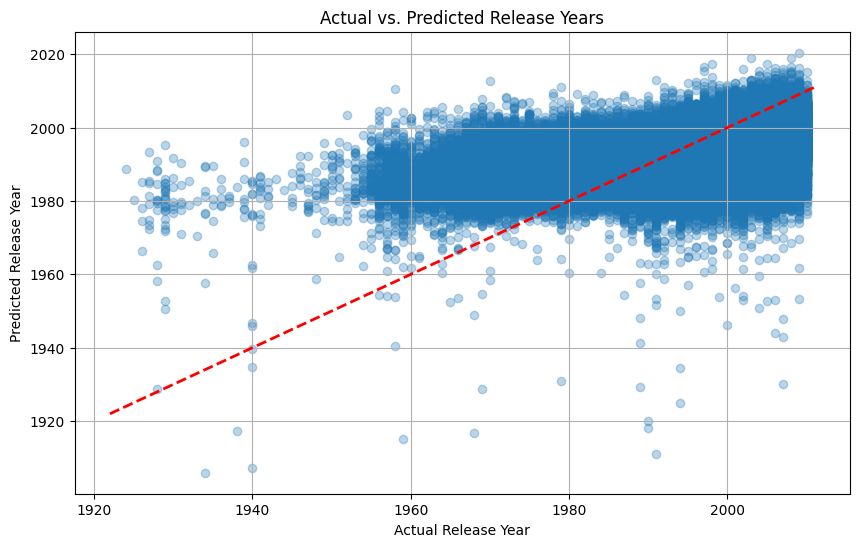

Plot generated successfully.


In [14]:
import matplotlib.pyplot as plt

print("Generating actual vs. predicted values plot...")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Diagonal line for perfect predictions
plt.xlabel('Actual Release Year')
plt.ylabel('Predicted Release Year')
plt.title('Actual vs. Predicted Release Years')
plt.grid(True)
plt.show()

print("Plot generated successfully.")

## Interpretasi Hasil

Penjelasan hasil berdasarkan evaluasi model dan grafik yang telah dibuat:

**Metrik Evaluasi Model Deep Learning:**
-   **Mean Squared Error (MSE):** 102.84
-   **Root Mean Squared Error (RMSE):** 10.14
-   **Mean Absolute Error (MAE):** 8.01
-   **R-squared (R²):** 0.1359

**Interpretasi:**

1.  **Nilai R-squared (R²) yang Rendah:**
    *   Nilai R-squared sebesar 0.1359 ini relatif rendah. Ini berarti model hanya mampu menjelaskan sekitar 13.59% dari variasi tahun rilis lagu berdasarkan fitur audio yang digunakan. Angka ini menunjukkan bahwa fitur audio saja belum menjadi prediktor yang kuat untuk tahun rilis lagu.

2.  **Mean Absolute Error (MAE) yang Cukup Tinggi:**
    *   MAE sebesar 8.01 berarti, rata-rata, prediksi model meleset sekitar 8.01 tahun dari tahun rilis yang sebenarnya. Ini menunjukkan bahwa meskipun model dapat menangkap beberapa pola, masih ada deviasi yang signifikan.

3.  **Root Mean Squared Error (RMSE) yang Sedikit Lebih Tinggi:**
    *   RMSE sebesar 10.14 lebih tinggi dari MAE, yang wajar karena RMSE lebih sensitif terhadap kesalahan yang besar (outlier). Kedua metrik ini mengonfirmasi bahwa ada cukup banyak kesalahan dalam prediksi model.

**Visualisasi (Scatter Plot Actual vs. Predicted Release Years):**

*   Plot menunjukkan titik-titik data yang cukup menyebar di sekitar garis diagonal (garis ideal di mana prediksi sama dengan nilai aktual). Hal ini secara visual mendukung rendahnya nilai R-squared dan menunjukkan bahwa prediksi model tidak terlalu akurat untuk banyak data.
*   Terlihat ada tren naik secara umum, yang berarti model memang mencoba memprediksi tahun yang lebih tinggi untuk lagu yang dirilis belakangan, dan sebaliknya. Namun, penyebaran data yang luas menunjukkan bahwa hubungan ini tidak kuat atau sangat bising.
*   Model mungkin bekerja sedikit lebih baik untuk lagu-lagu di rentang tahun pertengahan (misalnya, akhir 1990-an hingga awal 2000-an) di mana mungkin ada lebih banyak data atau pola yang lebih jelas, dan lebih kesulitan untuk tahun-tahun yang sangat awal atau sangat baru.

**Kesimpulan:**

Model deep learning ini berhasil menemukan beberapa hubungan antara fitur audio dan tahun rilis lagu, namun kemampuannya untuk memprediksi secara akurat masih terbatas. Fitur audio saja mungkin tidak cukup untuk menangkap semua nuansa yang menentukan tahun rilis lagu. Untuk meningkatkan kinerja, mungkin diperlukan penambahan fitur lain (seperti genre musik, informasi artis, atau tren musik eksternal) atau pendekatan rekayasa fitur yang lebih canggih.